# Facial Keypoint Detection
- [Step 1](#1): Detect faces using haar cascade classifier 
<br>
- [Step 2](#2): Add eye detection(if needed) 
<br>
- [Step 3](#3): Detect keypoints using the Facial Keypoint Detector model created in notebook.pynb
<br>


In [34]:
# %matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from PIL import Image
import time
import pandas as pd
import keras

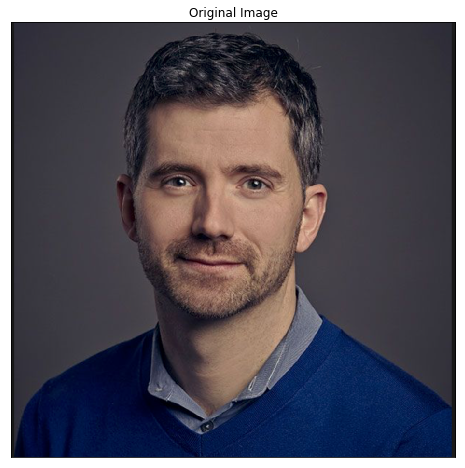

In [4]:
image = cv2.imread('image1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig = plt.figure( figsize = (8,8) )
ax = fig.add_subplot(111)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Original Image')

ax.imshow(image)

<a id="1"></a>
## Detect faces using haar cascade classifier:

In [97]:

def  detect_face(image, scale_factor, minNeighbours, show):    
    grayim = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    face_cascade= cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(grayim, scale_factor , minNeighbours)

    # Print the number of faces detected in the image
    print('Number of faces detected:', len(faces))

    copy_image = np.copy(image)
    # print(copy_image.shape)

    for (x,y,w,h) in faces:
#         print(x,y,w,h)
        cv2.rectangle(copy_image, (x,y), (x+w,y+h), (255,0,0), 3)

    # Plot our image using subplots to specify a size and title
    if(show == True):
        fig = plt.figure(figsize = (8,8))
        ax1 = fig.add_subplot(111)
        # to remove range labelling
        ax1.set_xticks([]) 
        ax1.set_yticks([])
        ax1.set_title('Image with face detected')
        ax1.imshow(copy_image)
    return copy_image, faces

Number of faces detected: 1


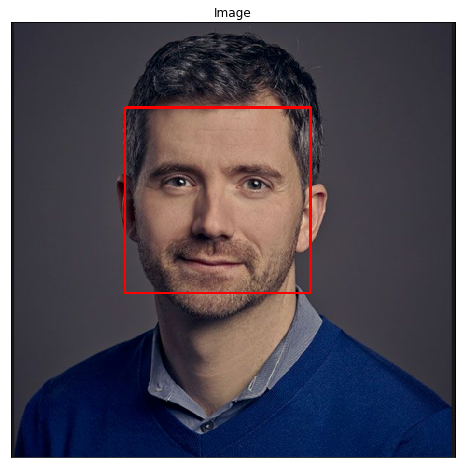

In [98]:
# For example
im = detect_face(image, 4, 6, True)

<a id="2"></a>
## Detect eyes:

In [102]:
def detect_eyes(image, scaleFactor, minNeighbours, show):
    eye_cascade= cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')
    grayim = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    copy_image = np.copy(image)
    eyes = eye_cascade.detectMultiScale(grayim, 2.2 , 3)

    print('Number of eyes detected:', len(eyes))

    for (x,y,w,h) in eyes:
#         print(x,y,w,h)
        cv2.rectangle(copy_image, (x,y), (x+w,y+h), (255,0,0), 3)

    if(show == True):
        fig = plt.figure(figsize = (8,8))
        ax1 = fig.add_subplot(111)
        # to remove range labelling
        ax1.set_xticks([]) 
        ax1.set_yticks([])

        ax1.set_title('Image with eyes detected')
        ax1.imshow(copy_image)
        plt.show()

Number of eyes detected: 2


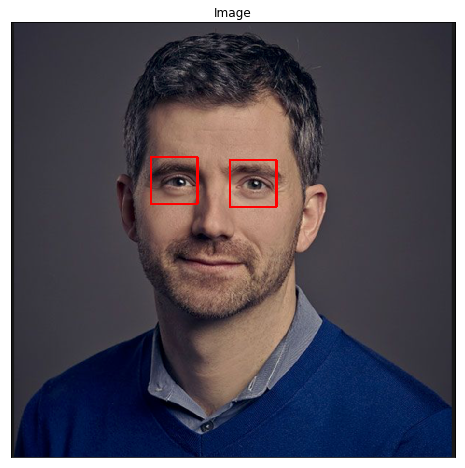

In [103]:
# For example
im = detect_eyes(image, 4, 6, True)

<a id="3"></a>
## Detect keypoints:

In [106]:
def plt_keypoints(image, scale_factor, minNeighbours):
    image_with_facedet, faces = detect_face(image, scale_factor, minNeighbours, False)
    
    model = keras.models.load_model('my_model_final.h5')
    for (x,y,w,h) in faces:
        crop_image = image_with_facedet[y:y+h, x:x+w]
        shape = crop_image.shape
        gray = cv2.cvtColor(crop_image, cv2.COLOR_RGB2GRAY)
        gray = cv2.resize(gray, (96,96))/ 255
        landmarks = np.squeeze(model.predict(np.expand_dims(np.expand_dims(gray, axis=-1), axis=0)))
        fig = plt.figure(figsize=(16, 16))
        ax = fig.add_subplot(121, xticks=[], yticks=[])
        ax.set_title('Image with Facial Keypoints')

        ax.scatter( ((landmarks[0::2] * 48 + 48) * shape[0]/96) + x, 
                       ((landmarks[1::2] * 48 + 48) * shape[1]/96) + y, 
                       marker='o', c='c', s=6)
        ax.imshow(image_with_facedet)
        plt.show()
    

Number of faces detected: 1


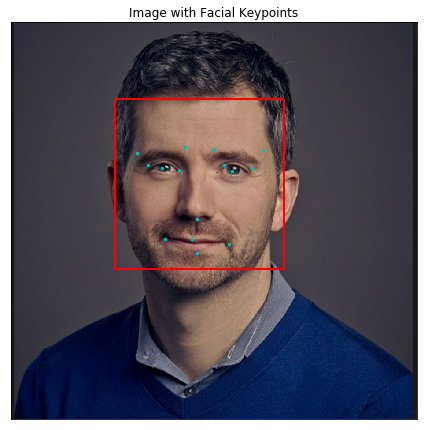

In [107]:
man = plt_keypoints( image, 4, 6)